In [1]:
from display import *
from grid import *
from path_finder import *

In [2]:
def basic_pattern_lines(size):
    # top, bottom
    yield (0 * size, 0 * size, 15 * size, 0 * size)
    yield (0 * size, 2.5 * size, 15 * size, 2.5 * size)
    
    for i in range(3):
        x = i * size * 5
        # down
        yield (x + 0 * size, 0 * size, x + 2 * size, 2 * size)
        yield (x + 2 * size, 2 * size, x + 2.5 * size, 1.5 * size)

        # up
        #x += 0.5
        yield (x + 2.5 * size, 2.5 * size, x + 4.5 * size, .5 * size)
        yield (x + 4.5 * size, .5 * size, x + 5 * size, 1 * size)


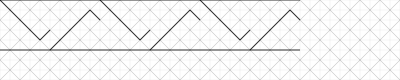

In [3]:
cols = 20
rows = 4
size = 20

display = Display(cols * size, rows * size)

basic_pat = list(basic_pattern_lines(size))

with display as context:
    context.set_line_width(0.5)
    context.set_source_rgba(0, 0, 0, 0.25)
    draw_simple_lines(context, diamond_grid(cols, rows, size))
    context.set_source_rgba(0, 0, 0, 0.08)
    draw_simple_lines(context, square_grid(cols*2, rows*2, size/2))
    
    context.set_line_width(1)
    context.set_source_rgba(0, 0, 0, 0.8)

    draw_simple_lines(context, basic_pat)

display.show()

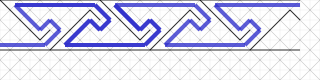

In [4]:

cols = 16
rows = 4
size = 20
display = Display(cols * size, rows * size)

basic_pat = list(basic_pattern_lines(size))
test_pat = np.concatenate([
    basic_pat,
    np.array([[0,2,5,2]]) * size,
#    np.array([[-1,2.1,4,2.1]]) * size,
    np.array([[6,2,8,2]]) * size,
#    np.array([[10.01,2.05,13,2.05]]) * size
])
test_pat = basic_pat

with display as context:
    context.set_line_width(0.5)
    context.set_source_rgba(0, 0, 0, 0.25)
    draw_simple_lines(context, diamond_grid(cols, rows, size))
    context.set_source_rgba(0, 0, 0, 0.08)
    draw_simple_lines(context, square_grid(cols*2, rows*2, size/2))
    
    context.set_line_width(1)
    context.set_source_rgba(0, 0, 0, 0.8)

    draw_simple_lines(context, test_pat)

    context.set_line_width(4)
    context.set_source_rgba(0.2, 0.2, 0.8, 0.8)

    pf = PathFind(np.array([0,2.25]) * size, (1,0), test_pat, size)

    for i in range(21):
        draw_simple_lines(context, list(pf.step()))
    
    #draw_simple_lines(context, list(
    #    path_find(np.array([0,2.25]) * size, (1,0), test_pat, size)
    #))
display.show()

In [5]:
def basic_pattern2_lines(size):
    # top, bottom
    yield (0 * size, 0 * size, 25 * size, 0 * size)
    yield (0 * size, 3 * size, 25 * size, 3 * size)
    
    for i in range(5):
        x = i * size * 6
        # down
        yield (x + 0 * size, 0 * size, x + 2.5 * size, 2.5 * size)
        yield (x + 2.5 * size, 2.5 * size, x + 3.5 * size, 1.5 * size)

        # up
        #x += 0.5
        yield (x + 3 * size, 3 * size, x + 5.5 * size, 0.5 * size)
        yield (x + 5.5 * size, .5 * size, x + 6.5 * size, 1.5 * size)

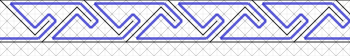

In [6]:
cols = 25
rows = 4
size = 14
display = Display(cols * size, rows * size)

basic_pat = list(basic_pattern2_lines(size))
test_pat = basic_pat

with display as context:
    context.set_line_width(0.5)
    context.set_source_rgba(0, 0, 0, 0.25)
    draw_simple_lines(context, diamond_grid(cols, rows, size))
    context.set_source_rgba(0, 0, 0, 0.08)
    draw_simple_lines(context, square_grid(cols*2, rows*2, size/2))
    
    context.set_line_width(1)
    context.set_source_rgba(0, 0, 0, 0.8)

    draw_simple_lines(context, test_pat)

    context.set_line_width(2.5)
    context.set_source_rgba(0.2, 0.2, 0.8, 0.8)

    pf = PathFind(np.array([0,2.75]) * size, (1,0), test_pat, size)

    for i in range(33):
        draw_simple_lines(context, list(pf.step()))

display.show()

In [7]:
def basic_pattern3_lines(size):
    # top, bottom
    yield (0 * size, 0 * size, 15 * size, 0 * size)
    yield (0 * size, 5 * size, 15 * size, 5 * size)
    # middle
    yield (2.5 * size, 2.5 * size, 7.5 * size, 2.5 * size)
    yield (7.5 * size, 2.5 * size, 12.5 * size, 2.5 * size)

    # left, right
    yield (0 * size, 0 * size, 0 * size, 5 * size)
    yield (15 * size, 0 * size, 15 * size, 5 * size)
    
    for i in range(3):
        x = i * size * 5
        # [top]
        # down
        yield (x + 0 * size, 0 * size, x + 2 * size, 2 * size)
        if i > 0:
            yield (x + 2 * size, 2 * size,
                   x + 2.5 * size, 1.5 * size)
        else:
            yield (x + 2.5 * size, 1.5 * size,
                   1.5 * size, 2.5 * size)

        # long middle lines
        yield (x + 0.5 * size, 4.5 * size,
                x + 4.5 * size, .5 * size)


        # ticks
        if i < 2:
            yield (x + 4.5 * size, .5 * size, x + 5 * size, 1 * size)
        if i > 0:
            yield (x + 0.5 * size, 4.5 * size, x, 4 * size)

        # up
        yield (x + 5 * size, 5 * size, x + 3 * size, 3 * size)
        if i < 2:
            yield (x + 3 * size, 3 * size,
                   x + 2.5 * size, 3.5 * size)
        else:
            yield (x + 2.5 * size, 3.5 * size,
                   11 * size + 2.5 * size, 2.5 * size)



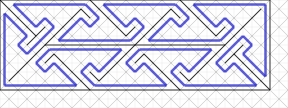

In [8]:
cols = 16
rows = 6
size = 18
display = Display(cols * size, rows * size)

basic_pat = list(basic_pattern3_lines(size))
test_pat = basic_pat

debug = np.array([
#(243.0, 53.99999999999999, 252.0, 44.99999999999999),
#(243.0, 53.99999999999999, 234.0, 62.99999999999999),
#(243.0, 53.99999999999999, 5103.0, -4806.0),
#(243.0, 36.0, -4617.0, 4896.0)
    [315., 135., 405.,  45.],
    [375., 105., 405.,  75.]
])

with display as context:
    context.set_line_width(0.5)
    context.set_source_rgba(0, 0, 0, 0.25)
    draw_simple_lines(context, diamond_grid(cols, rows, size))
    context.set_source_rgba(0, 0, 0, 0.08)
    draw_simple_lines(context, square_grid(cols*2, rows*2, size/2))
    
    context.set_line_width(1)
    context.set_source_rgba(0, 0, 0, 0.8)

    draw_simple_lines(context, test_pat)

    context.set_line_width(2.5)
    context.set_source_rgba(0.2, 0.2, 0.8, 0.8)

    pf = PathFind(np.array([0.75,0.25]) * size, (1,0), test_pat, size)

    for i in range(46):
        draw_simple_lines(context, list(pf.step()))

    context.set_source_rgba(0.8, 0.2, 0.2, 0.8)
    draw_simple_lines(context, debug)

display.show()

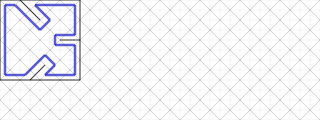

In [9]:
cols = 16
rows = 6
size = 20
display = Display(cols * size, rows * size)

test_pat = np.array([
    [0, 0, 4, 0],
    [4, 0, 4, 4],
    [0, 4, 4, 4],
    [0, 0, 0, 4],

    [1, 0, 2, 1],
    #[1.5, 4, 2.5, 3],
    [1.5, 4, 2.25, 3.25],
    [4, 2, 3, 2],
]) * size

debug = np.array([
#(100.0, 140.0, 120.0, 120.0),
#(100.0, 140.0, 80.0, 160.0),

])

with display as context:
    context.set_line_width(0.5)
    context.set_source_rgba(0, 0, 0, 0.25)
    draw_simple_lines(context, diamond_grid(cols, rows, size))
    context.set_source_rgba(0, 0, 0, 0.08)
    draw_simple_lines(context, square_grid(cols*2, rows*2, size/2))
    
    context.set_line_width(1)
    context.set_source_rgba(0, 0, 0, 0.8)

    draw_simple_lines(context, test_pat)

    context.set_line_width(2.5)
    context.set_source_rgba(0.2, 0.2, 0.8, 0.8)
    pf = PathFind(np.array([0.25,0.25]) * size, (1,0), test_pat, size)

    for i in range(13):
        draw_simple_lines(context, list(pf.step()))

    context.set_source_rgba(0.8, 0.2, 0.2, 0.8)
    draw_simple_lines(context, debug)


display.show()

In [10]:
    # - may want midpoint walls from which do not need to backup, but do bifurate
    #   e.g. below

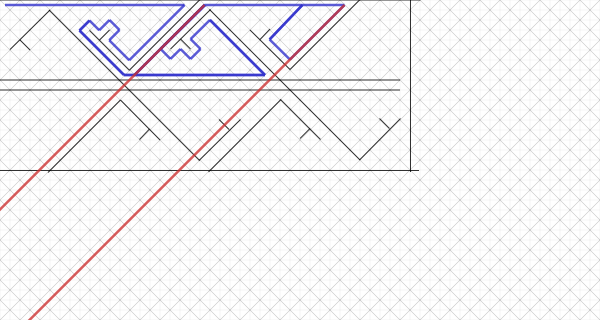

In [11]:
cols = 30
rows = 16
size = 20
display = Display(cols * size, rows * size)
import pandas as pd

df = pd.read_csv("utils/coords.csv")

test_pat = np.array([
   [0, 0, 4, 0],
    [4, 0, 4, 4]
]) * size

test_pat = (df.to_numpy() + [-12.8, -97, -12.8, -97]) * 1.42000001

test_pat = np.round(test_pat * 2) / 2
test_pat = np.round(test_pat, 3)

test_pat = np.concatenate([test_pat, np.array([
    [0, 4, 20, 4],
    [0, 4.5, 20, 4.5]
]) * size])

debug = np.array([
(344.5, 5.0, -8145.5, 8495.0),
(204.5, 5.0, -8285.5, 8495.0)
])

with display as context:
    context.set_line_width(0.5)
    context.set_source_rgba(0, 0, 0, 0.25)
    draw_simple_lines(context, diamond_grid(cols, rows, size))
    context.set_source_rgba(0, 0, 0, 0.08)
    draw_simple_lines(context, square_grid(cols*2, rows*2, size/2))
    
    context.set_line_width(1)
    context.set_source_rgba(0, 0, 0, 0.8)

    draw_simple_lines(context, test_pat)

    context.set_line_width(2.5)
    context.set_source_rgba(0.2, 0.2, 0.8, 0.8)

    pf = PathFind(np.array([0.25,0.25]) * size, (1,0), test_pat, size)
    for i in range(18):
        draw_simple_lines(context, list(pf.step()))
    
    context.set_source_rgba(0.8, 0.2, 0.2, 0.8)
    draw_simple_lines(context, debug)

# looks like floating point issues, therefore may be best to generate these
# patterns exactly in code
display.show()